# Feature Selection and Scaling

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import os
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler

In [3]:
os.chdir("C:\\Users\\kumarvch\\OneDrive - HP Inc\\census_income_casestudy")

In [257]:
data = pd.read_csv("pre_data.csv")
test= pd.read_csv("pre_test.csv")

In [258]:
data.shape, test.shape

((32561, 16), (16281, 16))

In [259]:
data.drop("Unnamed: 0" , axis=1 ,inplace=True)
test.drop("Unnamed: 0" , axis=1 ,inplace=True)

* education column is lable encoded as education staus with high-value given to Doctarate and low value given to preschool so we can remove education column and keep only education status

In [260]:
data.drop("education" , axis=1 ,inplace=True)
test.drop("education" , axis=1 ,inplace=True) 

In [261]:
data.head()

,age,workclass,fnlwgt,education_status,marital-status,occupation,relationship,race,sex,capital-gain,capital-los,hours-per-week,native-country,Income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,329054,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [262]:
data['native-country'].value_counts(normalize=True)

 United-States                 0.913762
 Mexico                        0.019748
 Philippines                   0.006081
 Germany                       0.004207
 Canada                        0.003716
 Puerto-Rico                   0.003501
 El-Salvador                   0.003255
 India                         0.003071
 Cuba                          0.002918
 England                       0.002764
 Jamaica                       0.002488
 South                         0.002457
 China                         0.002303
 Italy                         0.002242
 Dominican-Republic            0.002150
 Vietnam                       0.002058
 Guatemala                     0.001966
 Japan                         0.001904
 Poland                        0.001843
 Columbia                      0.001812
 Taiwan                        0.001566
 Haiti                         0.001351
 Iran                          0.001321
 Portugal                      0.001136
 Nicaragua                     0.001044


United states is the country for more than 90% of the Native country field, hence it is better to combine all other countries to others

In [264]:
data['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [267]:
data['native-country'] = data['native-country'].replace([' Cuba', ' Jamaica', ' India',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'],'others')

In [268]:
test['native-country'] = test['native-country'].replace([' Cuba', ' Jamaica', ' India',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'],'others')

In [217]:
data['native-country'].value_counts(normalize=True)

 United-States    0.913762
others            0.066491
 Mexico           0.019748
Name: native-country, dtype: float64

In [218]:
test['native-country'].value_counts(normalize=True)

 United-States    0.917388
others            0.063694
 Mexico           0.018918
Name: native-country, dtype: float64

Income,<=50K,>50K
native-country,,
Mexico,0.948678,0.051322
United-States,0.754075,0.245925
others,0.773210,0.226790


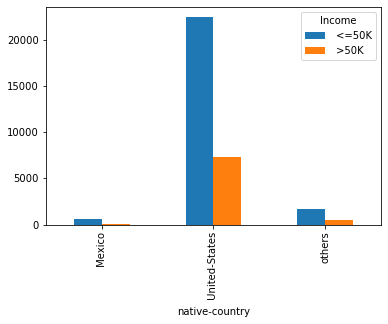

In [34]:
data.groupby(['native-country']).Income.value_counts().unstack().plot(kind='bar')
data.groupby(['native-country']).Income.value_counts(normalize = True).unstack()

In [64]:
data.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [270]:
test.race.unique()

array([' Black', ' White', ' Asian-Pac-Islander', ' Other',
       ' Amer-Indian-Eskimo'], dtype=object)

In [271]:
data['race'] = data['race'].replace([' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'] , 'Other')

In [272]:
test['race'] = test['race'].replace([' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'] , 'Other')

In [273]:
data.shape, test.shape

((32561, 14), (16281, 14))

# Feature selection

In [220]:
cnames = [feature for feature in data.columns if data[feature].dtypes != 'O']

In [221]:
cnames.remove('education_status')

In [222]:
data[cnames]

,age,fnlwgt,capital-gain,capital-los,hours-per-week
0,39,77516,2174,0,40
1,50,83311,0,0,13
2,38,215646,0,0,40
3,53,234721,0,0,40
4,28,329054,0,0,40
...,...,...,...,...,...
32556,27,257302,0,0,38
32557,40,154374,0,0,40
32558,58,151910,0,0,40
32559,22,201490,0,0,20


### correlation plot for colinearity between two features

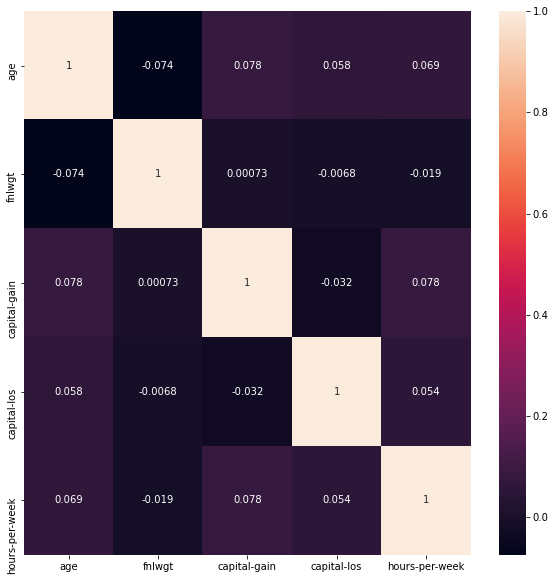

In [223]:
plt.figure(figsize=(10,10))
sb.heatmap(data[cnames].corr() , annot=True, )
plt.show()

### multicollinearity check

In [224]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [225]:
calc_vif(data[cnames])

,variables,VIF
0,age,6.234615
1,fnlwgt,4.284578
2,capital-gain,1.030342
3,capital-los,1.054298
4,hours-per-week,7.087880


In [226]:
## if the VIF score for any feature is greater than 10 , it is a clear sigh of multicollinearity

### Correlation between categorical features

In [227]:
cat_names = [features for features in data.columns if data[features].dtypes == 'O']

In [228]:
cat_names.append('education_status')

In [229]:
for i in cat_names:
    chi2 , p , dof , ex = chi2_contingency(pd.crosstab(data[i] , data['Income']))
    print(" pvalue for the variable {} is {} ".format(i , p , dof))   

 pvalue for the variable workclass is 2.026505431120716e-220 
 pvalue for the variable marital-status is 0.0 
 pvalue for the variable occupation is 0.0 
 pvalue for the variable relationship is 0.0 
 pvalue for the variable race is 2.305960610160958e-70 
 pvalue for the variable sex is 0.0 
 pvalue for the variable native-country is 1.404981041141479e-29 
 pvalue for the variable Income is 0.0 
 pvalue for the variable education_status is 0.0 


In [345]:
test.Income.unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [230]:
# p value for all the featues are less than 0.05 so we reject the null hypothesis that they are independent, so we consider all the variable for out analysis

In [370]:
data_final = data.copy()
data_final_test = test.copy()

In [371]:
data_final

,age,workclass,fnlwgt,education_status,marital-status,occupation,relationship,race,sex,capital-gain,capital-los,hours-per-week,native-country,Income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,329054,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,others,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [372]:
data_final_test.head()

,age,workclass,fnlwgt,education_status,marital-status,occupation,relationship,race,sex,capital-gain,capital-los,hours-per-week,native-country,Income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,327203,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,Local-gov,103497,10,Never-married,Transport-moving,Own-child,White,Female,0,0,30,United-States,<=50K.


In [373]:
cat_names = [features for features in data.columns if data[features].dtypes == 'O']
cat_names_test = [features for features in test.columns if test[features].dtypes == 'O']

In [374]:
cat_names.remove('Income')
cat_names_test.remove('Income')

In [375]:
cat_names

['workclass',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [376]:
cat_names_test

['workclass',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [377]:
data_final = pd.get_dummies(data_final ,columns=cat_names ,  drop_first=True)
data_final_test = pd.get_dummies(data_final_test ,columns=cat_names_test ,  drop_first=True)

In [378]:
data_final.shape

(32561, 45)

In [379]:
data_final_test.shape

(16281, 45)

In [380]:
data_final["Income"]=data_final["Income"].map({" <=50K":0," >50K":1})
data_final_test["Income"]=data_final_test["Income"].map({" <=50K.":0," >50K.":1})

In [381]:
data_final['Capital_Diff'] = data_final['capital-gain'] - data_final['capital-los']
data_final.drop(['capital-gain'], axis = 1, inplace = True)
data_final.drop(['capital-los'], axis = 1, inplace = True)

In [382]:
data_final_test['Capital_Diff'] = data_final_test['capital-gain'] - data_final_test['capital-los']
data_final_test.drop(['capital-gain'], axis = 1, inplace = True)
data_final_test.drop(['capital-los'], axis = 1, inplace = True)

In [383]:
cnames1=['age' ,'fnlwgt' , 'hours-per-week','Income','Capital_Diff' ]

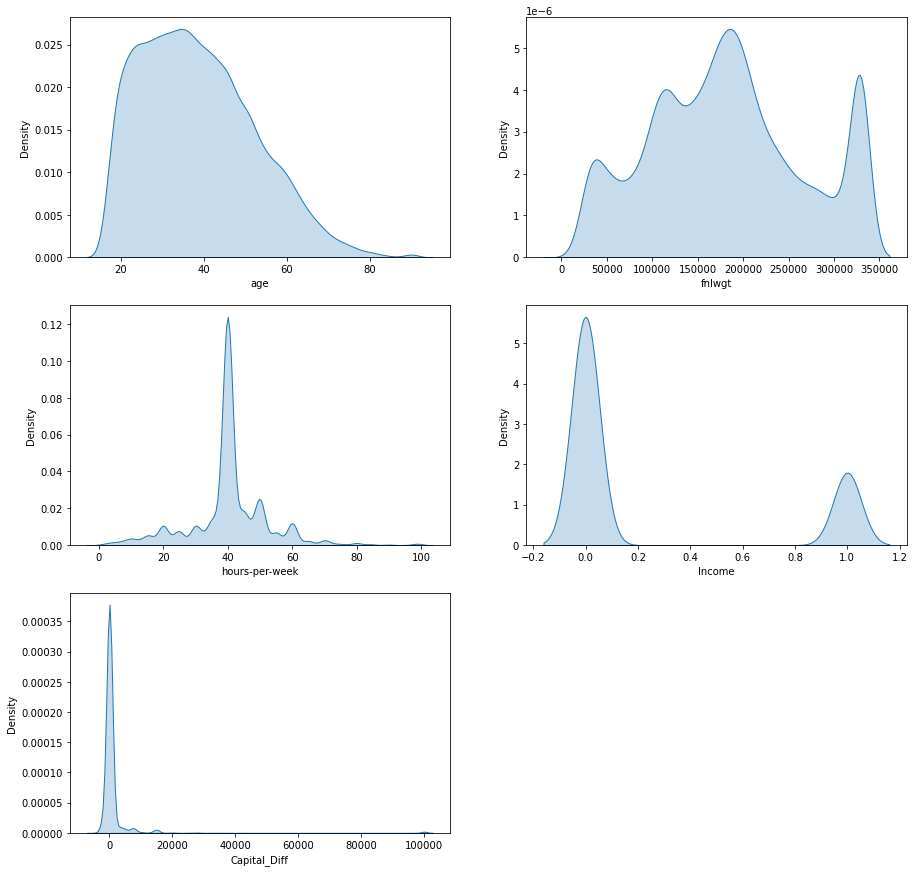

In [384]:
plt.figure(figsize=(15,15))
for i in enumerate(cnames1):
    plt.subplot(3,2,i[0]+1)
    sb.kdeplot(data_final[i[1]], fill= True , legend = True)
plt.show()

# SCALING

In [385]:
data_std_scl = data_final.copy()
data_std_sl_test = data_final_test.copy()

In [386]:
cnames2=['age' ,'fnlwgt' , 'hours-per-week','Capital_Diff' ]

In [387]:
for i in cnames2:
    scale = StandardScaler().fit(data_std_scl[[i]])
    data_std_scl[i]=scale.transform(data_std_scl[[i]]) 

In [388]:
for i in cnames2:
    scale = StandardScaler().fit(data_std_sl_test[[i]])
    data_std_sl_test[i]=scale.transform(data_std_sl_test[[i]]) 

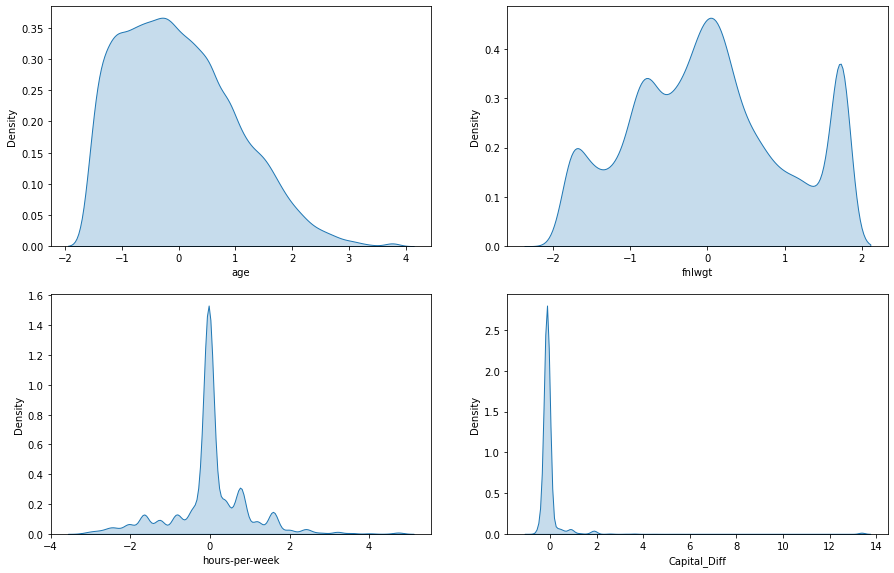

In [393]:
plt.figure(figsize=(15,15))
for i in enumerate(cnames2):
    plt.subplot(3,2,i[0]+1)
    sb.kdeplot(data_std_scl[i[1]], fill= True , legend = True)
plt.show()

In [390]:
data_std_scl.shape ,data_std_sl_test.shape

((32561, 44), (16281, 44))

In [391]:
data_final.to_csv("data_final.csv" ,index=False)
data_std_scl.to_csv("data_std_scale.csv" , index = False)
data_std_sl_test.to_csv("data_std_scale_test.csv" , index = False)